# Importing required packages

In [1083]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Loading the data set

In [1084]:
dataset_rawmat = pd.read_csv('dataset_rawmat.csv')

In [1085]:
dataset_rawmat

,Squre feet,thickness,cement,sand,bricks,steel
0,1,4,76,1.8,1.45,4
1,500,4,38000,900.0,725.00,2000
2,600,4,45600,1080.0,870.00,2400
3,900,4,68400,1620.0,1305.00,3600
4,1000,4,76000,1800.0,1450.00,4000
5,2000,4,152000,3600.0,2900.00,8000
6,2500,4,190000,4500.0,3625.00,10000
7,3000,4,228000,5400.0,4350.00,12000
8,3500,4,266000,6300.0,5075.00,14000


In [1086]:
dataset_rawmat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Squre feet  9 non-null      int64  
 1   thickness   9 non-null      int64  
 2   cement      9 non-null      int64  
 3   sand        9 non-null      float64
 4   bricks      9 non-null      float64
 5   steel       9 non-null      int64  
dtypes: float64(2), int64(4)
memory usage: 560.0 bytes


In [1087]:
dataset_rawmat.describe()

,Squre feet,thickness,cement,sand,bricks,steel
count,9.000000,9.0,9.000000,9.000000,9.000000,9.000000
mean,1555.666667,4.0,118230.666667,2800.200000,2255.716667,6222.666667
std,1231.823445,0.0,93618.581831,2217.282201,1786.143995,4927.293781
min,1.000000,4.0,76.000000,1.800000,1.450000,4.000000
25%,600.000000,4.0,45600.000000,1080.000000,870.000000,2400.000000
50%,1000.000000,4.0,76000.000000,1800.000000,1450.000000,4000.000000
75%,2500.000000,4.0,190000.000000,4500.000000,3625.000000,10000.000000
max,3500.000000,4.0,266000.000000,6300.000000,5075.000000,14000.000000


In [1088]:
sum(dataset_rawmat.isnull().sum())

0

In [1089]:
print((dataset_rawmat[['Squre feet','thickness','cement','sand','bricks','steel']]==0).sum())

Squre feet    0
thickness     0
cement        0
sand          0
bricks        0
steel         0
dtype: int64


# Defining X data set

In [1090]:
x = dataset_rawmat['Squre feet']
x

0       1
1     500
2     600
3     900
4    1000
5    2000
6    2500
7    3000
8    3500
Name: Squre feet, dtype: int64

# Converting X data set as a numpy (Single dimentional) array

In [1091]:
x1 = np.array(x.values)
x1

array([   1,  500,  600,  900, 1000, 2000, 2500, 3000, 3500], dtype=int64)

# Defining Y data set

In [1092]:
y1 = dataset_rawmat.drop(['Squre feet','thickness','cement','bricks','steel'],axis=1)
y1

,sand
0,1.8
1,900.0
2,1080.0
3,1620.0
4,1800.0
5,3600.0
6,4500.0
7,5400.0
8,6300.0


# Converting X data set as a numpy (Single dimentional) array

In [1093]:
y01 = np.array(y1.values)
y01

array([[1.80e+00],
       [9.00e+02],
       [1.08e+03],
       [1.62e+03],
       [1.80e+03],
       [3.60e+03],
       [4.50e+03],
       [5.40e+03],
       [6.30e+03]])

# Visualizing X and Y dataset values in x,y Graph

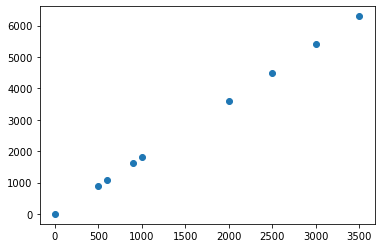

In [1094]:
plt.scatter(x1,y01)

# Splitting X and Y dataset to training set and testing sets

In [1095]:
from sklearn.model_selection import train_test_split
X_train,X_test,y01_train,y01_test =train_test_split(x1.reshape((-1,1)),y01, test_size=0.25)

In [1096]:
def check_accOfModel(model):
    model.fit(X_train,y01_train)
    acc = model.score(X_test,y01_test)
    print(str(model)+'-->'+str(acc))

In [1097]:
from sklearn.linear_model import LinearRegression
m1 =LinearRegression()
check_accOfModel(m1)

LinearRegression()-->1.0


In [1098]:
#m1 Model saving
import pickle
with open('m2.pickle','wb') as file:
    pickle.dump(m1,file)

In [1099]:
# input1 = np.array([525]).reshape((-1,1))
# input1

In [1100]:
# m1.predict(input1)

In [1101]:
with open('m1.pickle','rb') as file:
   m1 = pickle.load(file)
with open('m2.pickle','rb') as file:
   m2 = pickle.load(file)
with open('m3.pickle','rb') as file:
   m3 = pickle.load(file)
with open('m4.pickle','rb') as file:
   m4 = pickle.load(file)
sft = input("Enter the area of house to predict raw material amount : ")
myinput = np.array([sft]).reshape((-1,1))
cement = m1.predict(myinput)
sand = m2.predict(myinput)
bricks = m3.predict(myinput)
steel = m4.predict(myinput)
print("{","'Cement'",':',"'",cement[0,0],"'",",","'Sand'",':',"'",sand[0,0],"'",",","'Bricks'",":","'",bricks[0,0],"'",",","'Steel'",":","'",steel[0,0],"'","}")

Enter the area of house to predict raw material amount : 1
{ 'Cement' : ' 75.99999999998546 ' , 'Sand' : ' 1.8000000000004546 ' , 'Bricks' : ' 1.4500000000004545 ' , 'Steel' : ' 4.0 ' }


C:\Users\Geethan\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Geethan\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Geethan\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.